# **Decision Trees and Random Forests**


In this in-class assignment, we will be using a decision tree model to predict voter turnout based on factors such as: 

*   Distance to the polling station (distance)
*   Income (income)
*   Age (age)
*   Female (female)

The goal of the assignment is to gain practical experience with decision tree modeling and to understand how it can be used to make predictions about complex relationships between variables.


## **Getting the data ready** 

Let's first import the data.

In [1]:
# import dataset

import pickle

with open('voting_data.pickle', 'rb') as file:
    data = pickle.load(file)

print(data)



      distance        income  turnout  age  female
0     1.251399  42997.480444        1   88       1
1     0.494880  48695.892065        1   18       1
2     0.515264  44498.341242        1   96       0
3     0.392000  49194.331480        1   61       0
4     1.305971  39090.250423        0   18       1
...        ...           ...      ...  ...     ...
4827  0.968238  47558.138533        1   37       0
4828  0.368316  41854.024095        1   61       1
4829  0.375412  37611.033976        0   53       1
4830  0.355192  48970.462045        1   47       1
4831  0.309871  39220.917024        0   28       1

[4832 rows x 5 columns]


## **Exploring the data** 

We will explore the dataset and perform some exploratory data analysis to understand the relationships between the variables.

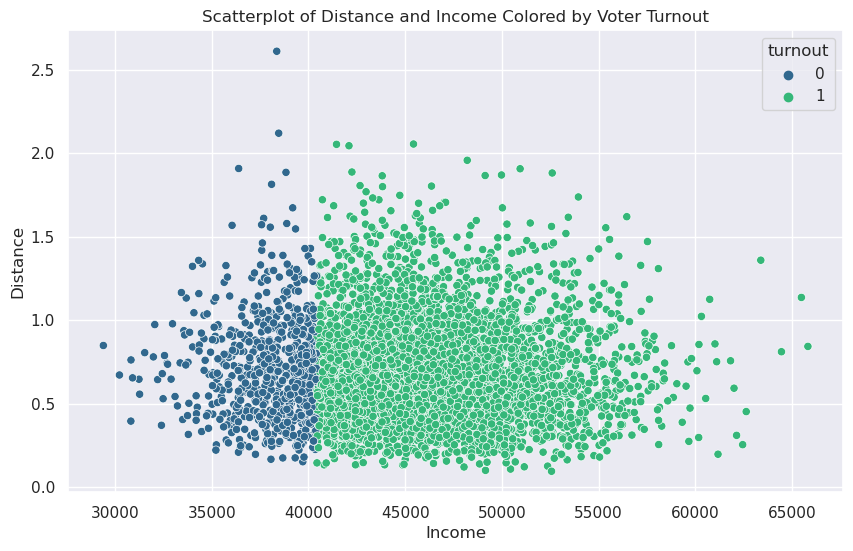

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn theme
sns.set_theme(style='darkgrid')

# Create a scatterplot of distance (x) and income (y), colored by voter_turnout
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='distance', hue='turnout', data=data, palette='viridis')

# Customize the plot
plt.title('Scatterplot of Distance and Income Colored by Voter Turnout')
plt.ylabel('Distance')
plt.xlabel('Income')

# Show the plot
plt.show()

## **Splitting the data**

In [3]:
# Split the data into features (X) and target (y)
X = data[["income", "distance", "female", "age"]]
y = data["turnout"]

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into 70% train and 30% test, set seed for 1 for reproductivity 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## **Regression Tree Model**


In [4]:

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate a Decision Tree with random_state set to 10, max_depth set to 2, and max_leaf_nodes set to 3
dt = DecisionTreeRegressor(random_state = 10, max_depth = 2, max_leaf_nodes=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels (using X_test)
y_pred = dt.predict(X_test)

# Import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

# Compute test set accuracy  (using accuracy_score on y_test and y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

# Compute test-set MSE, using MSE(y_test, y_pred)
mse_dt = MSE(y_test, y_pred)
# Compute test-set RMSE, using mse_dt**(1/2)
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print(rmse_dt)



Test set accuracy: 1.00
0.0


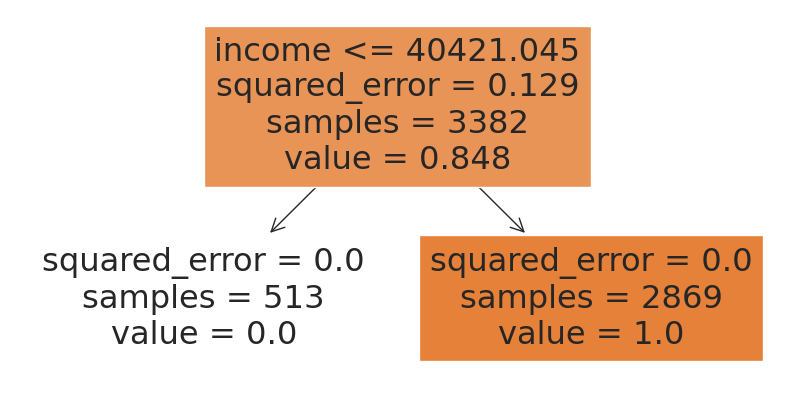

In [5]:
# Visualize a tree 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_tree(dt, filled=True,
          feature_names = ['income', 'distance', 'female', 'age'], 
          class_names = ['turnout'])
plt.show()

## **Random Forest Model and Feature Importance**

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=1)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred' (using X_test)
y_pred = rf.predict(X_test)
y_pred
# Evaluate the test set RMSE (using the formula: MSE(y_test, y_pred)**(1/2))
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print(rmse_test)

0.16710163109415035


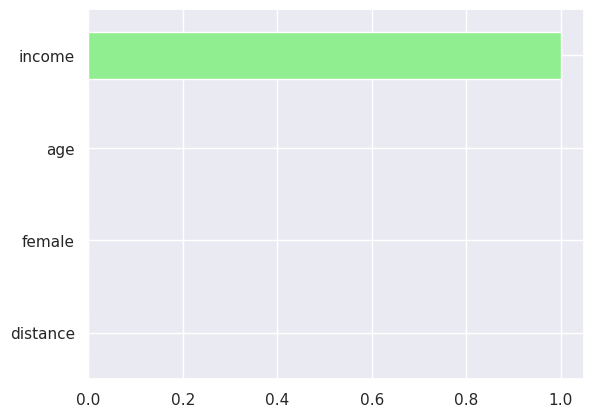

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

## **Tuning Hyperparameters**

In [8]:
# Basic imports

from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter 'params_rf' with n_estimators, max_depth, and min_samples_leaf
params_rf = {
'n_estimators': [300, 400, 500],
'max_depth': [1, 2, 3], 
'min_samples_leaf': [0.1, 0.2]
}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
param_grid=params_rf,
cv=3,
scoring='neg_mean_squared_error',
verbose=1,
n_jobs=-1)

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train) # if the grid could not properly show on jupyter, run the cell again

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(min_samples_leaf=0.12,
                                             n_estimators=400, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [9]:
# Access the best parameters
best_params = grid_rf.best_params_
best_params


{'max_depth': 1, 'min_samples_leaf': 0.1, 'n_estimators': 300}